# Unit 5 - Financial Planning

In [21]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('keys.env')


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

# YOUR CODE HERE!

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
btc_json = requests.get(btc_url).json()
btc_json['data']['1']['quotes']['USD']['price']

26942.0

In [6]:
eth_json = requests.get(eth_url).json()
eth_json['data']['1027']['quotes']['USD']['price']

1791.37

In [7]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_json = requests.get(btc_url).json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
# YOUR CODE HERE!
eth_json = requests.get(eth_url).json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = (my_btc * btc_price)
my_eth_value = (my_eth * eth_price)
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $32330.40
The current value of your 5.3 ETH is $9494.26


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = 'v2')

In [10]:
# Format current date as ISO format
today = pd.Timestamp('2023-05-09', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
current_prices  = alpaca.get_bars(tickers, timeframe, start = today, end = today).df

# Reorganize the DataFrame
# Separate ticker data
AGG = current_prices[current_prices['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = current_prices[current_prices['symbol'] == 'SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
current_prices = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Preview DataFrame
current_prices

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-05-09 04:00:00+00:00  99.11  99.19  99.01  99.01  5712210       22222   

                                         SPY                            \
                                vwap    open    high       low   close   
timestamp                                                                
2023-05-09 04:00:00+00:00  99.077911  411.13  412.09  410.6894  410.93   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-05-09 04:00:00+00:00  49220119      385994  411.356198

In [11]:
# Pick AGG and SPY close prices
agg_close_price = current_prices['AGG']['close'][0]
spy_close_price = current_prices['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.01
Current SPY closing price: $410.93


In [12]:
# Compute the current value of shares
my_agg_value = (agg_close_price * my_agg)
my_spy_value = (spy_close_price * my_spy)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20546.50
The current value of your 200 AGG shares is $19802.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
assets_type = ["crypto", "shares"]
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(index=[assets_type])
df_savings['amount'] = [crypto_value, shares_value]
# Display savings DataFrame
df_savings

,amount
crypto,41824.661
shares,40348.500


<Axes: ylabel='amount'>

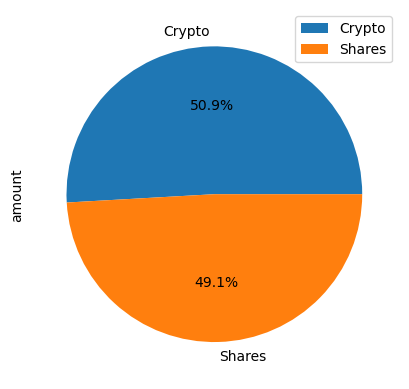

In [14]:
# Plot savings pie chart
labels = 'Crypto', 'Shares'
df_savings.plot.pie(y='amount',subplots=False, autopct='%1.1f%%', labels=labels)

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'][0] + df_savings['amount'][1]

# Validate saving health
if total_savings < emergency_fund:
    print(f"You have enought money to invest if there was an emergency")
elif total_savings > emergency_fund:
    print(f"You do not have enought money in your savings to invest.")

You do not have enought money in your savings to invest.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-05-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-09', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis = 1)
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-05-09 04:00:00+00:00  105.56  105.64  105.52  105.57  2507491   
2018-05-10 04:00:00+00:00  105.75  105.82  105.69  105.81  2096854   
2018-05-11 04:00:00+00:00  105.90  105.90  105.76  105.86  2034081   
2018-05-14 04:00:00+00:00  105.79  105.85  105.74  105.76  2183502   
2018-05-15 04:00:00+00:00  105.49  105.49  105.19  105.29  2166571   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-05-09 04:00:00+00:00        8019  105.586028  267.68  269.865  267.09   
2018-05-10 04:00:00+00:00        8645  105.750081  270.34  272.390  270.22   
2018-05-11 04:00:00+00:00        8714  105.850098  272.16  273.150  271.58   
2018-05-14 04:00:00+00:00       10216  105.800146  273.34  274.080  272.36   
2018-05-15 04:00:00+00:00        9762  105.340494  271.59  271.610  270.03   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-05-09 04:00:00+00:00  269.47  59773310      255999  268.713210  
2018-05-10 04:00:00+00:00  272.00  72065572      258139  271.419538  
2018-05-11 04:00:00+00:00  272.64  59909145      215034  272.463557  
2018-05-14 04:00:00+00:00  272.95  55292206      215002  273.086937  
2018-05-15 04:00:00+00:00  271.03  87156564      303002  270.964245

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6], 
    num_simulation = 500, 
    num_trading_days = 252 * 30
)

In [19]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-05-09 04:00:00+00:00  105.56  105.64  105.52  105.57  2507491   
2018-05-10 04:00:00+00:00  105.75  105.82  105.69  105.81  2096854   
2018-05-11 04:00:00+00:00  105.90  105.90  105.76  105.86  2034081   
2018-05-14 04:00:00+00:00  105.79  105.85  105.74  105.76  2183502   
2018-05-15 04:00:00+00:00  105.49  105.49  105.19  105.29  2166571   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-05-09 04:00:00+00:00        8019  105.586028          NaN  267.68   
2018-05-10 04:00:00+00:00        8645  105.750081     0.002273  270.34   
2018-05-11 04:00:00+00:00        8714  105.850098     0.000473  272.16   
2018-05-14 04:00:00+00:00       10216  105.800146    -0.000945  273.34   
2018-05-15 04:00:00+00:00        9762  105.340494    -0.004444  271.59   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-05-09 04:00:00+00:00  269.865  267.09  269.47  59773310      255999   
2018-05-10 04:00:00+00:00  272.390  270.22  272.00  72065572      258139   
2018-05-11 04:00:00+00:00  273.150  271.58  272.64  59909145      215034   
2018-05-14 04:00:00+00:00  274.080  272.36  272.95  55292206      215002   
2018-05-15 04:00:00+00:00  271.610  270.03  271.03  87156564      303002   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-05-09 04:00:00+00:00  268.713210          NaN  
2018-05-10 04:00:00+00:00  271.419538     0.009389  
2018-05-11 04:00:00+00:00  272.463557     0.002353  
2018-05-14 04:00:00+00:00  273.086937     0.001137  
2018-05-15 04:00:00+00:00  270.964245    -0.007034

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999128,0.999545,1.002226,1.006492,0.999502,1.019649,0.999457,0.999082,1.007533,1.002185,...,1.002752,0.996563,1.008954,1.002702,0.989381,1.008476,0.999097,1.013891,0.999396,0.992760
2,1.006051,1.011855,1.013027,1.011485,0.990345,1.023190,0.989345,0.999137,1.001732,1.004708,...,1.002411,1.003335,1.015565,0.992613,0.985188,0.994706,1.006141,1.019415,0.983963,0.984540
3,1.003303,1.012278,1.011615,0.997565,0.999240,1.015934,0.970225,0.985236,1.010940,1.015867,...,0.998866,1.021002,1.023221,1.001777,0.995684,0.999954,1.015049,1.012085,0.986202,0.996467
4,1.009938,1.009016,1.001493,1.005928,0.999449,1.023458,0.973019,0.975302,1.018816,0.991193,...,0.998837,1.017807,1.033300,0.991925,0.986850,0.993208,1.029534,1.023080,0.977548,1.002993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.104622,1.546254,4.118219,10.948104,4.948370,3.984018,6.146331,5.845966,2.540677,13.247179,...,6.176179,7.919893,5.262871,6.042336,8.845061,3.615619,3.938286,2.219286,6.167999,7.866234
7557,9.071821,1.565828,4.110073,11.000677,4.919257,3.929214,6.213098,5.937989,2.562411,13.214366,...,6.271220,7.967995,5.320502,6.065424,8.889597,3.602787,3.925693,2.212429,6.192445,7.875080
7558,9.132975,1.566629,4.100043,10.989602,4.922703,3.935071,6.292552,5.927915,2.573625,13.265526,...,6.373389,7.966882,5.411467,6.021101,8.819000,3.642835,3.932221,2.207489,6.115173,7.866310
7559,9.219336,1.577121,4.073589,11.106296,4.921325,3.970870,6.287121,5.939445,2.551215,13.123260,...,6.389362,7.957159,5.359681,5.989535,8.759566,3.686369,3.889426,2.206976,6.151227,7.877575


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

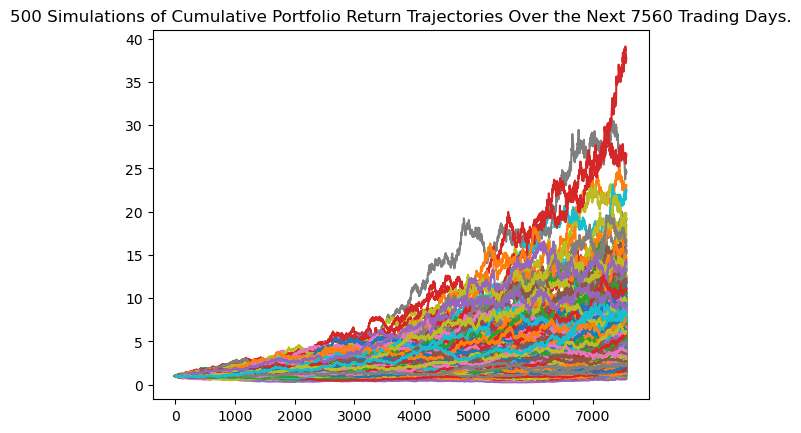

In [23]:
# Plot simulation outcomes
MC_30_year.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

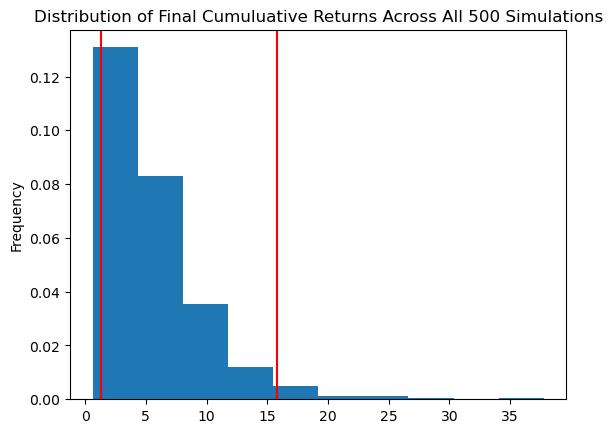

In [24]:
# Plot probability distribution and confidence intervals
MC_30_year.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30_year_analysis = MC_30_year.summarize_cumulative_return()

# Print summary statistics
MC_30_year_analysis

count           500.000000
mean              5.667480
std               4.152891
min               0.636315
25%               2.823807
50%               4.535063
75%               7.348070
max              37.771831
95% CI Lower      1.332168
95% CI Upper     15.819684
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30_year_analysis[8]*initial_investment,2)
ci_upper = round(MC_30_year_analysis[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26643.36 and $316393.67


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30_year_analysis[8]*initial_investment,2)
ci_upper = round(MC_30_year_analysis[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $39965.05 and $474590.51


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")